In [74]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [75]:
# Loading the exchanges
bitsmap = pd.read_csv('Bitstamp_BTCUSD_2020_minute.csv')
gemini = pd.read_csv('gemini_BTCUSD_2020_1min.csv')

In [76]:
bitsmap.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1609459140,12/31/2020 23:59,BTC/USD,28982.44,29024.59,28969.83,28992.79,5.897679,170990.18290
1,1609459080,12/31/2020 23:58,BTC/USD,29044.79,29048.62,29000.12,29000.12,20.362289,590508.83780
2,1609459020,12/31/2020 23:57,BTC/USD,29039.53,29048.63,29023.26,29044.79,14.503728,421257.72150
3,1609458960,12/31/2020 23:56,BTC/USD,29052.02,29059.42,29039.28,29039.53,2.707583,78626.92585
4,1609458900,12/31/2020 23:55,BTC/USD,29036.10,29052.02,29025.78,29052.02,7.631439,221708.70540


In [77]:
gemini.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.609460e+12,12/31/2020 23:59,BTCUSD,28993.75,28995.49,28951.44,28979.74,0.337088
1,1.609460e+12,12/31/2020 23:58,BTCUSD,29017.39,29019.86,28993.75,28993.75,0.079929
2,1.609460e+12,12/31/2020 23:57,BTCUSD,29035.97,29035.97,29017.39,29017.39,0.013799
3,1.609460e+12,12/31/2020 23:56,BTCUSD,29036.19,29036.19,29022.59,29035.97,0.199008
4,1.609460e+12,12/31/2020 23:55,BTCUSD,29043.69,29043.69,29025.75,29036.19,0.082642


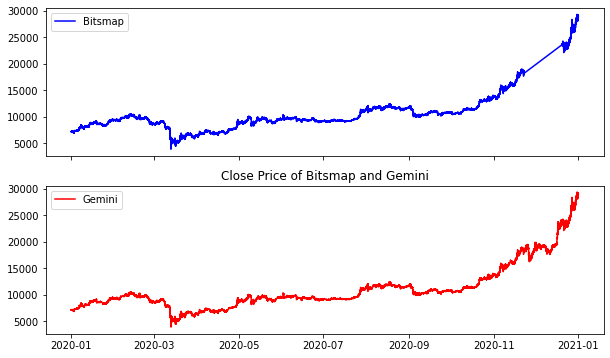

In [78]:
# Converting date column type to datetime
bitsmap['date'] = pd.to_datetime(bitsmap['date'])
gemini['Date'] = pd.to_datetime(gemini['Date'])

# Plot the close price of both the exchanges
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
plt.title('Close Price of Bitsmap and Gemini')
ax[0].plot(bitsmap['date'], bitsmap['close'], color='b', label='Bitsmap')
ax[0].legend()
ax[1].plot(gemini['Date'], gemini['Close'], color='r', label='Gemini')
ax[1].legend()

In [79]:
# Renaming the columns of bitsmap 
bitsmap.rename(columns = {'close':'Close','date':'Date'}, inplace = True)

# filtering the data to only data and close value
bitsmap = bitsmap[['Date','Close']]
gemini = gemini[['Date','Close']]
df = bitsmap.merge(gemini, on = 'Date', how = 'inner', right_index = False)

# Sorting the values according to date
df.sort_values('Date', inplace = True)

In [80]:
# Calculating the cross corelation using scipy.signal.correlate function and method fft
corr = correlate(df['Close_x'] , df['Close_y'], mode='same', method='fft') 

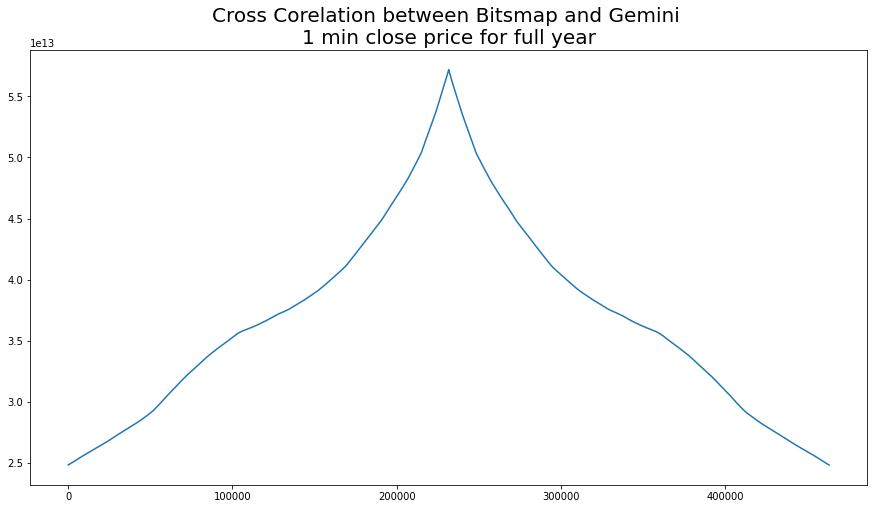

In [81]:
# plot for cross corelation for full year 
plt.figure(figsize = (15,8))
plt.title('Cross Corelation between Bitsmap and Gemini \n1 min close price for full year', fontsize = 20)
plt.plot(corr)

In [82]:
# time delay between the bitsmap and gemini for full year 2020
def compute_delay(x, y):
    assert len(x) == len(y)
    c = correlate(x, y, mode='same', method='fft')
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    delay = zero_index - np.argmax(c)
    return delay

delay = compute_delay(df['Close_x'] , df['Close_y'])
print(delay)

-1


In [83]:
# time delay between the bitsmap and gemini for january 2020
new_df = df[df['Date']<'2020-02']
corr = correlate(new_df['Close_x'], new_df['Close_y'], mode='same')
delay = compute_delay(new_df['Close_x'], new_df['Close_y'])
print(delay)

-1


In [84]:
# time delay between the bitsmap and gemini for February 2020
new_df = df[(df['Date']<'2020-03') & (df['Date']>'2020-02')] 
delay = compute_delay(new_df['Close_x'], new_df['Close_y'])
print(delay)

-1


In [85]:
# time delay between the bitsmap and gemini for March 2020
new_df = df[(df['Date']<'2020-04') & (df['Date']>'2020-03')]
delay = compute_delay(new_df['Close_x'], new_df['Close_y'])
print(delay)

-1


In [86]:
# time delay between the bitsmap and gemini for July 2020
new_df = df[(df['Date']<'2020-08') & (df['Date']>'2020-07')]
delay = compute_delay(new_df['Close_x'], new_df['Close_y'])
print(delay)

-1
